<a href="https://colab.research.google.com/github/joanjeremiah/991-calls-data-capstone/blob/main/911_calls_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sample_data/911.csv')

**info() for df**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


**head() for df**

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Top 5 zipcodes for 911 calls**

In [ ]:
df['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

**Top 5 townships for 911 calls**

In [ ]:
df['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

**No of unique title codes in the df**

In [ ]:
df['title'].nunique()

131

**Creating a new column 'Reason' for storing Reasons/Departments in title.For example,if the title column value is: 'EMS: BACK PAINS/INJURY',the Reason column value would be 'EMS'**

In [ ]:
df['Reason'] = df['title'].apply(lambda title:title.split(':')[0])

In [ ]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
289235        EMS
289236       Fire
289237    Traffic
289238    Traffic
289239    Traffic
Name: Reason, Length: 289240, dtype: object

**Most common reason for 911 calls**

In [ ]:
df['Reason'].value_counts().head(1)

EMS    144362
Name: Reason, dtype: int64

**Plotting countplot of 911 calls by Reason using seaborn.**

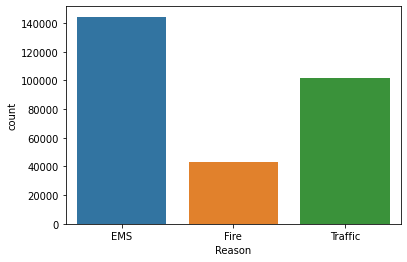

In [ ]:
sns.countplot(x = 'Reason',data=df)

**Datatype of objects in timeStamp column**

In [ ]:
type(df['timeStamp'].iloc[0])

str

**Converting the timeStamp column from string to DateTime objects**

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
289235   2017-12-30 11:11:36
289236   2017-12-30 11:11:30
289237   2017-12-30 11:15:24
289238   2017-12-30 11:12:03
289239   2017-12-30 11:14:31
Name: timeStamp, Length: 289240, dtype: datetime64[ns]

**Creating 3 new columns Hour, Month, Day form DateTime object in timeStamp column**

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda date:date.hour)
df['Month'] = df['timeStamp'].apply(lambda date:date.month)
df['Day'] = df['timeStamp'].apply(lambda date:date.dayofweek)

In [ ]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,NaN
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,NaN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,NaN


**Converting column day from integer to a string of corresponding day**

In [ ]:
dmap = {0: 'Mon',1: 'Tue',2: 'Wed',3: 'Thu',4: 'Fri',5: 'Sat',6: 'Sun'}

In [ ]:
df['Day'] = df['Day'].map(dmap)

In [ ]:
df['Day']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
289235    Sat
289236    Sat
289237    Sat
289238    Sat
289239    Sat
Name: Day, Length: 289240, dtype: object

**Creating countplot of Day column with the hue based off of Reason column**

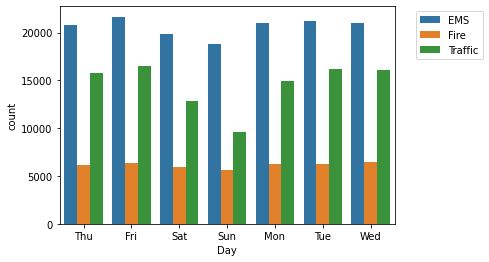

In [ ]:
sns.countplot(x="Day",hue="Reason",data=df)
# Relocating the legend
plt.legend(bbox_to_anchor=(1.05,1))

*Some months are missing in the above plot.Trying to solve this..*

In [ ]:
byMonth = df.groupby('Month').count()

In [ ]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093
6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,24065
7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,23856
8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,23657
9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,23001


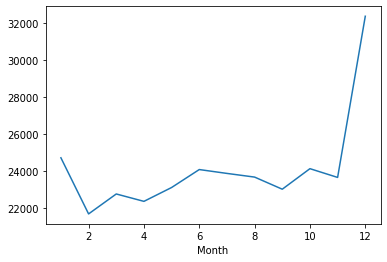

In [ ]:
byMonth['lat'].plot()

*This shows the data for all the months and you can see the trend more clearly.*

**Using seaborn's lmplot() to create linear fit on the number of calls per month**

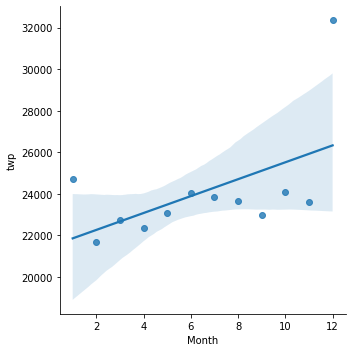

In [ ]:
sns.lmplot(x="Month",y="twp",data=byMonth.reset_index())

**Creating a date column from the timeStamp column**

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda timeStamp:timeStamp.date())

In [ ]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
289235    2017-12-30
289236    2017-12-30
289237    2017-12-30
289238    2017-12-30
289239    2017-12-30
Name: Date, Length: 289240, dtype: object

**Now grouping df by Date column**

In [ ]:
byDate = df.groupby('Date').count()

In [ ]:
byDate.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,date
Date,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402


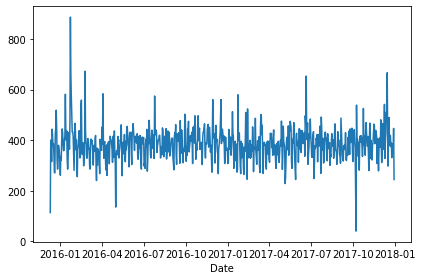

In [ ]:
byDate['lat'].plot()
plt.tight_layout()

**Recreating the same plot but create 3 seperate plots with each plot representing a reason for the 911 calls**

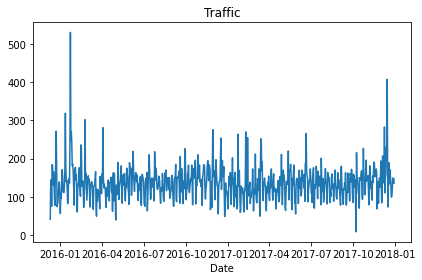

In [ ]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

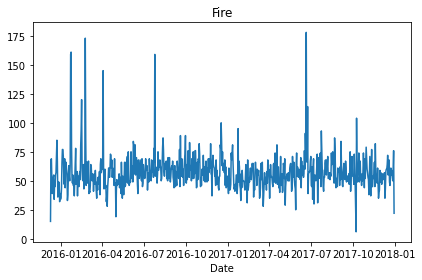

In [ ]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

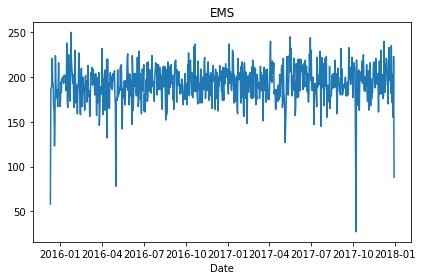

In [ ]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [ ]:
dayHour = df.groupby(by=['Day','Hour']).count()['Reason'].unstack()

**Creating a heatmap for dayHour dataframe**

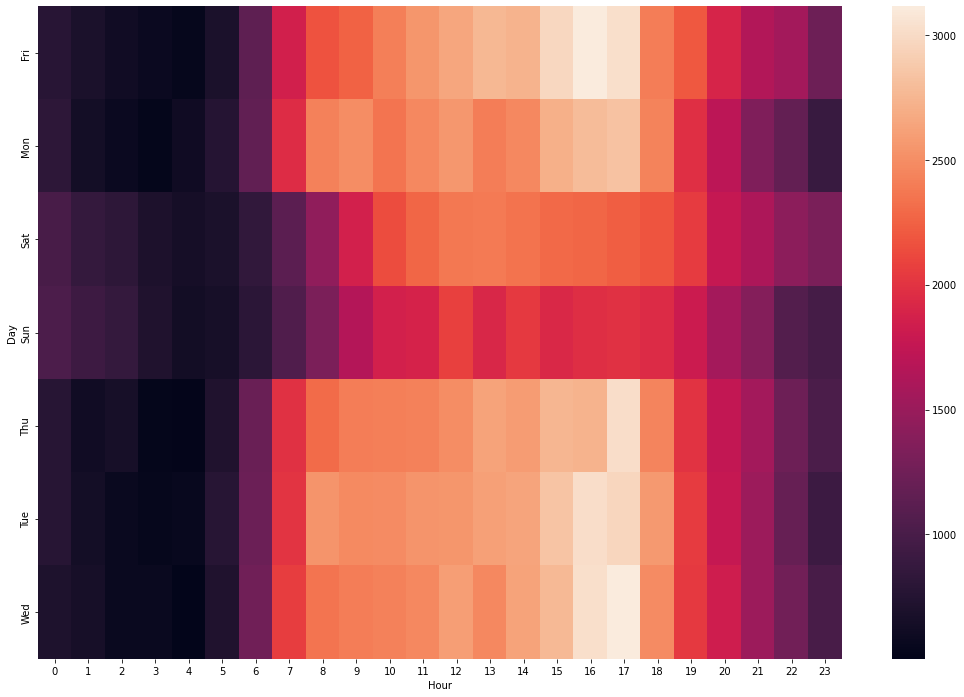

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(dayHour)

**Creating a clustermap for the same**


<Figure size 1296x864 with 0 Axes>

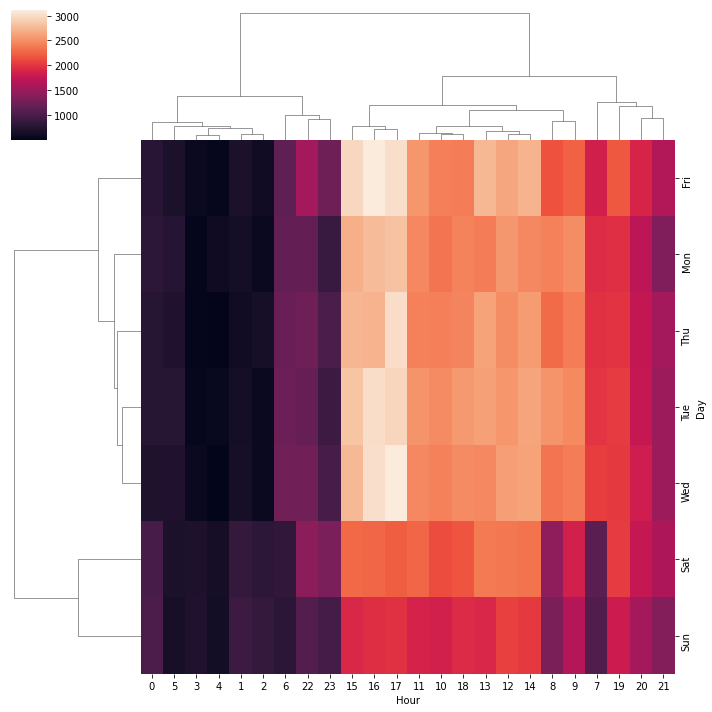

In [ ]:
plt.figure(figsize=(18,12))
sns.clustermap(dayHour)

**Creating similiar plots for date and month**

In [ ]:
dayMonth = df.groupby(by=['Day','Month']).count()['Reason'].unstack()

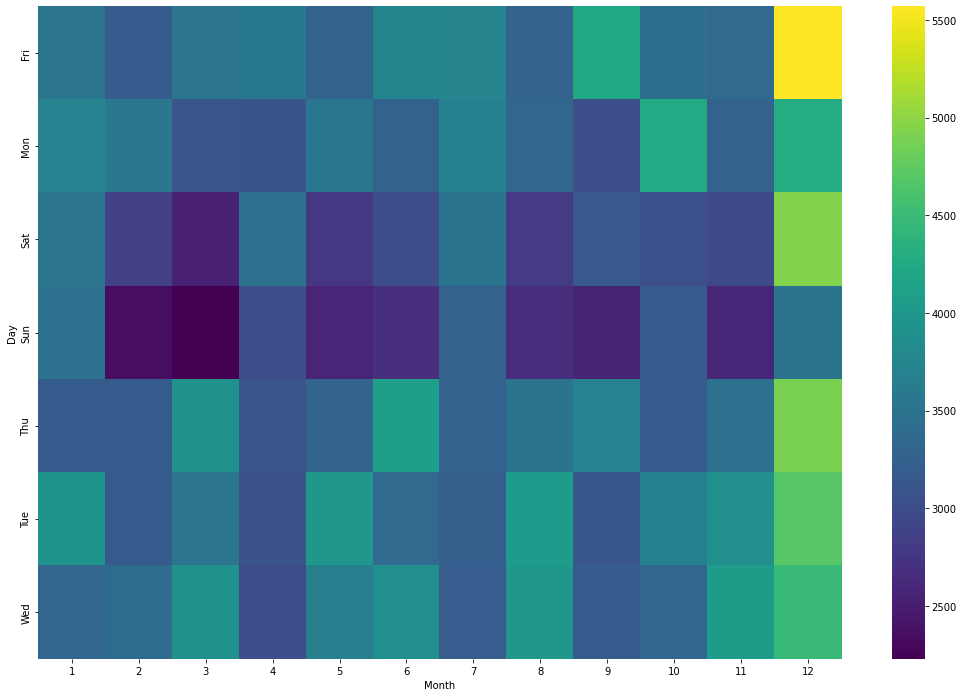

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(dayMonth,cmap="viridis")

<Figure size 1296x864 with 0 Axes>

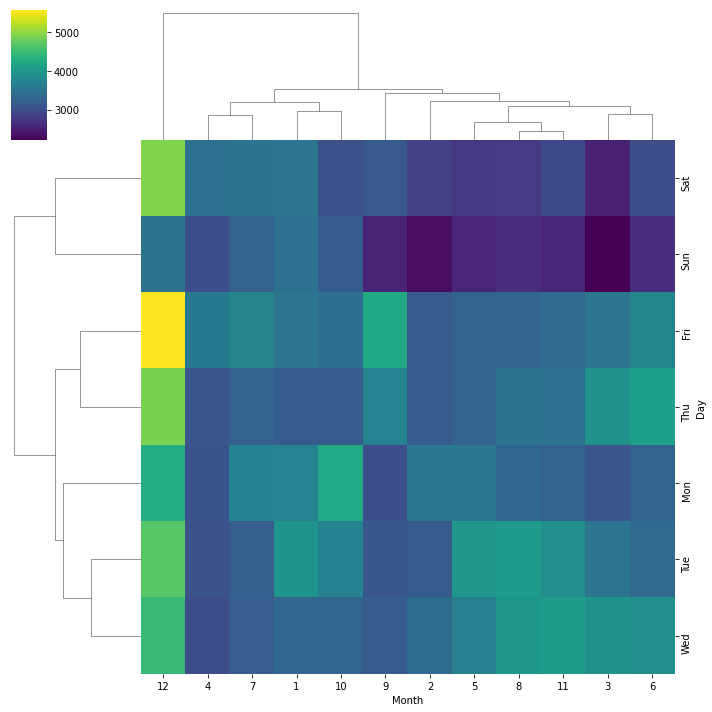

In [ ]:
plt.figure(figsize=(18,12))
sns.clustermap(dayMonth,cmap="viridis")

**The end of project**